# Prediction of California Housing Dataset by DNN model

## Get Data

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load dataset
dataset = fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
# Assign variable
x = dataset.data # ndarray, shape (20640, 8)
y = dataset.target # numpy array of shape (20640,)
x_label = dataset.feature_names # list of length 8
y_label = dataset.target_names

In [4]:
raw_x = pd.DataFrame(x, columns=x_label)
raw_x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
raw_x.describe()
# - MedInc        median income in block group
# - HouseAge      median house age in block group
# - AveRooms      average number of rooms per household
# - AveBedrms     average number of bedrooms per household
# - Population    block group population
# - AveOccup      average number of household members
# - Latitude      block group latitude
# - Longitude     block group longitude

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
raw_y = pd.DataFrame(y, columns=y_label)
raw_y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [7]:
raw_y.describe()
# The median house value for California districts expressed in hundreds of thousands of dollars ($100,000).

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


<AxesSubplot:>

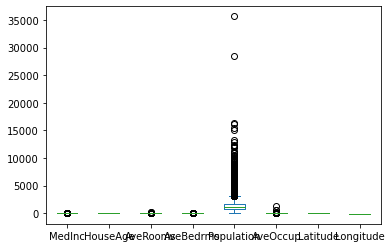

In [8]:
raw_x.plot.box()

<AxesSubplot:>

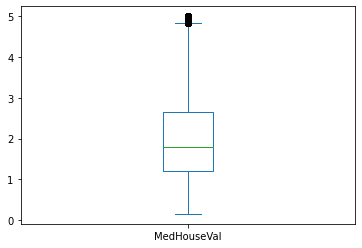

In [9]:
raw_y.plot.box()

## Cleaning Data

In [10]:
x_scaler = MinMaxScaler()
scaled_x = x_scaler.fit_transform(raw_x)
scaled_x = pd.DataFrame(scaled_x, columns=x_label)

In [11]:
scaled_x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
y_scaler = MinMaxScaler()
scaled_y = y_scaler.fit_transform(raw_y)
scaled_y = pd.DataFrame(scaled_y, columns=y_label)

In [13]:
scaled_y.describe()

,MedHouseVal
count,20640.000000
mean,0.395579
std,0.237928
min,0.000000
25%,0.215671
50%,0.339588
75%,0.514897
max,1.000000


<AxesSubplot:>

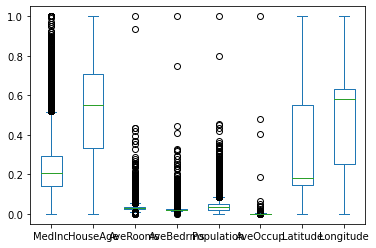

In [14]:
scaled_x.plot.box()

<AxesSubplot:>

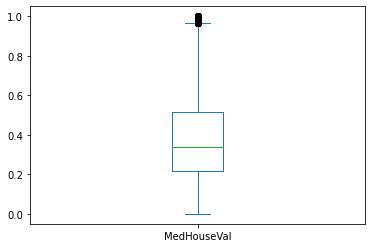

In [15]:
scaled_y.plot.box()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, random_state=101)

In [17]:
# x_train
# x_test
# y_train
# y_test
x_train.describe()
# x_test.describe()
# y_train.describe()
# y_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.232512,0.541534,0.032488,0.022595,0.039933,0.001827,0.328884,0.475662
std,0.130034,0.246886,0.016761,0.013834,0.031781,0.001770,0.227474,0.199673
min,0.000000,0.000000,0.000303,0.000000,0.000000,0.000000,0.001063,0.004980
25%,0.142934,0.333333,0.025566,0.019934,0.021974,0.001403,0.147715,0.253984
50%,0.209138,0.549020,0.031079,0.021187,0.032568,0.001715,0.182784,0.582669
75%,0.293106,0.705882,0.036902,0.022683,0.048124,0.002089,0.549416,0.631474
max,1.000000,1.000000,0.933535,1.000000,0.800555,0.184671,1.000000,0.982072


## Train Model

In [18]:
model = Sequential()
model.add(Dense(200, activation="linear", input_dim=8))
model.add(Dense(1000, activation="linear"))
model.add(Dense(1, activation="linear"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1800      
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              201000    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 203,801
Trainable params: 203,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer="sgd", loss="mse", metrics=["accuracy"])

In [20]:
history = model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=1)

Epoch 1/100
226/226 [==============================] - 0s 728us/step - loss: 0.0427 - accuracy: 0.0243
Epoch 2/100
226/226 [==============================] - 0s 715us/step - loss: 0.0304 - accuracy: 0.0347
Epoch 3/100
226/226 [==============================] - 0s 728us/step - loss: 0.0268 - accuracy: 0.0370
Epoch 4/100
226/226 [==============================] - 0s 724us/step - loss: 0.0256 - accuracy: 0.0375
Epoch 5/100
226/226 [==============================] - 0s 728us/step - loss: 0.0251 - accuracy: 0.0376
Epoch 6/100
226/226 [==============================] - 0s 728us/step - loss: 0.0248 - accuracy: 0.0380
Epoch 7/100
226/226 [==============================] - 0s 719us/step - loss: 0.0245 - accuracy: 0.0381
Epoch 8/100
226/226 [==============================] - 0s 715us/step - loss: 0.0243 - accuracy: 0.0382
Epoch 9/100
226/226 [==============================] - 0s 728us/step - loss: 0.0241 - accuracy: 0.0379
Epoch 10/100
226/226 [==============================] - 0s 724us/step - l

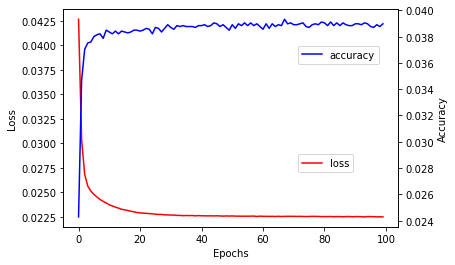

In [21]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history["loss"], "r", label="loss")
acc_ax.plot(history.history["accuracy"], "b", label="accuracy")

loss_ax.set_xlabel("Epochs")
loss_ax.set_ylabel("Loss")
acc_ax.set_ylabel("Accuracy")
loss_ax.legend(loc=(0.7, 0.25))
acc_ax.legend(loc=(0.7, 0.75))

plt.show()

## Evaluate Model

In [22]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print(f"{loss=}, {acc=}")

194/194 [==============================] - 0s 406us/step - loss: 0.0237 - accuracy: 0.0412
test loss: 0.023655150085687637
test accuracy: 0.04118217155337334


In [23]:
y_pred = model.predict(x_test)

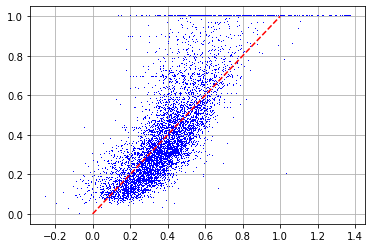

In [24]:
plt.plot(y_pred, y_test, "b,")
plt.plot([0, 1], [0, 1], "r--")

plt.grid()
plt.show()

In [25]:
inversed_pred = y_scaler.inverse_transform(y_pred)
inversed_actual = y_scaler.inverse_transform(y_test)

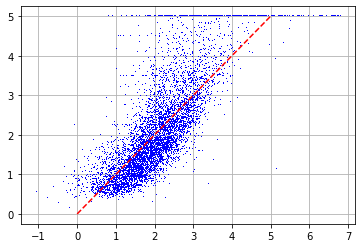

In [26]:
plt.plot(inversed_pred, inversed_actual, "b,")
plt.plot([0, 5], [0, 5], "r--")

plt.grid()
plt.show()